In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-uci-dataset/diabetes.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../input/diabetes-uci-dataset/diabetes.csv')


In [5]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<AxesSubplot:>

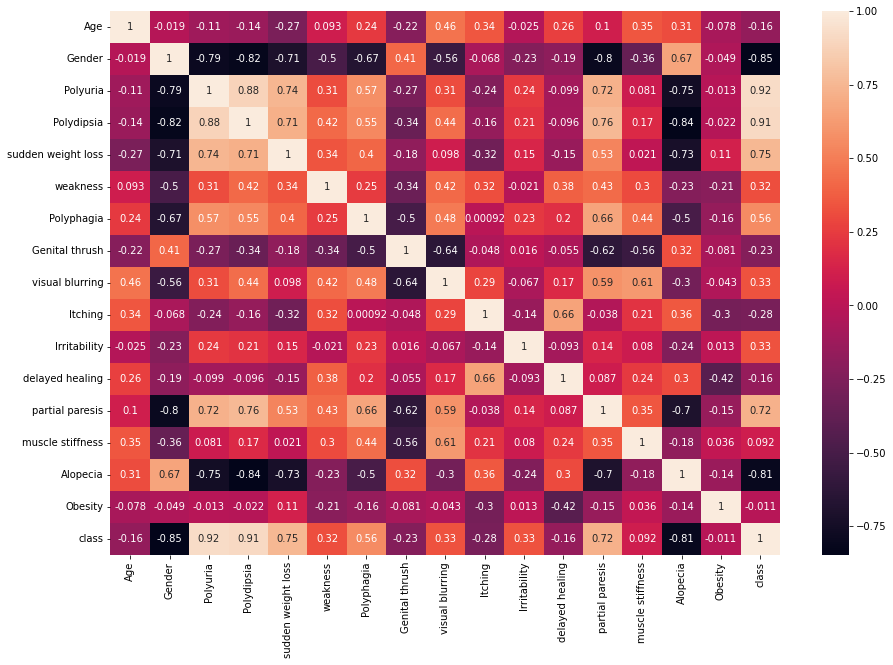

In [7]:
cor_mat = df.corr()
plt.figure(figsize=(15,10))
top_corr_features = cor_mat.index
sns.heatmap(cor_mat[top_corr_features].corr(),annot=True)

In [8]:
#Taking features where correlation <-0.5 or >0.5
X = df[['Polydipsia','Polyuria','sudden weight loss','partial paresis','Gender','Polyphagia','Alopecia']]
y = df['class']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True)

In [9]:
X_train

,Polydipsia,Polyuria,sudden weight loss,partial paresis,Gender,Polyphagia,Alopecia
180,1,1,1,1,0,0,0
144,1,1,0,1,1,1,0
457,1,1,1,1,0,1,0
466,0,0,0,0,1,0,0
38,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...
313,0,0,1,0,1,0,1
406,0,0,1,0,1,1,1
390,0,0,0,1,1,0,0
143,0,1,1,1,1,0,0


In [10]:
y_train

180    1
144    1
457    1
466    0
38     1
      ..
313    0
406    0
390    0
143    1
241    0
Name: class, Length: 416, dtype: int64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9375

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bag = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
bag.fit(X_train, y_train)
bag.score(X_train, y_train)

0.8846153846153846

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.9110576923076923

In [14]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(X_train, y_train)
abc.score(X_train, y_train)

0.8942307692307693

In [15]:
from sklearn.metrics import accuracy_score
y1 = model.predict(X_test)
accuracy_score(y1, y_test)

0.9615384615384616

In [16]:
y2 = bag.predict(X_test)
print(accuracy_score(y2, y_test))
y3 = gbc.predict(X_test)
print(accuracy_score(y3, y_test))
y4 = abc.predict(X_test)
print(accuracy_score(y4, y_test))

0.9423076923076923
0.9423076923076923
0.8942307692307693


In [18]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report
print(classification_report(y_test,y1))
print(classification_report(y_test,y2))
print(classification_report(y_test,y3))
print(classification_report(y_test,y4))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.95      0.98      0.97        59

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.95      0.95      0.95        59

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        45
           1       0.92      0.98      0.95        59

    accuracy                           0.94       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

              preci

In [82]:
model.predict(np.array([0,0,0,0,1,0,0]).reshape(1, -1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [84]:
from joblib import dump, load
dump(model, 'diabetes_predictor.joblib') 

['diabetes_predictor.joblib']

In [85]:
clf = load('diabetes_predictor.joblib') 
clf.predict(np.array([0,0,0,0,1,0,0]).reshape(1, -1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [86]:
import pickle
s = pickle.dumps(model)